In [93]:
# ==========================================
# 04 - SHAP Model Explainability
# ==========================================

import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")


In [94]:
df = pd.read_csv("../data/processed/ai4i2020_features.csv")
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (10000, 44)


,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,...,Rotational_speed_rpm_roll5_mean,Rotational_speed_rpm_roll5_std,Rotational_speed_rpm_roll7_mean,Rotational_speed_rpm_roll7_std,Torque_Nm_roll3_mean,Torque_Nm_roll3_std,Torque_Nm_roll5_mean,Torque_Nm_roll5_std,Torque_Nm_roll7_mean,Torque_Nm_roll7_std
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.columns = (
    df.columns
    .str.replace(' ', '_')
    .str.replace('[', '', regex=False)
    .str.replace(']', '', regex=False)
    .str.replace('/', '_')
)

df.columns.tolist()


['Type',
 'Air_temperature_K',
 'Process_temperature_K',
 'Rotational_speed_rpm',
 'Torque_Nm',
 'Tool_wear_min',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'label',
 'Power_kw',
 'Temp_Delta',
 'Wear_x_Torque',
 'Stress_Index',
 'Torque_per_Wear',
 'Speed_x_Temp',
 'Torque_sq',
 'Log_Tool_Wear',
 'Temp_Squared',
 'Speed_sq',
 'Combined_Energy',
 'High_Temp_Flag',
 'Wear_Bin',
 'Seq',
 'Process_temperature_K_roll3_mean',
 'Process_temperature_K_roll3_std',
 'Process_temperature_K_roll5_mean',
 'Process_temperature_K_roll5_std',
 'Process_temperature_K_roll7_mean',
 'Process_temperature_K_roll7_std',
 'Rotational_speed_rpm_roll3_mean',
 'Rotational_speed_rpm_roll3_std',
 'Rotational_speed_rpm_roll5_mean',
 'Rotational_speed_rpm_roll5_std',
 'Rotational_speed_rpm_roll7_mean',
 'Rotational_speed_rpm_roll7_std',
 'Torque_Nm_roll3_mean',
 'Torque_Nm_roll3_std',
 'Torque_Nm_roll5_mean',
 'Torque_Nm_roll5_std',
 'Torque_Nm_roll7_mean',
 'Torque_Nm_roll7_std']

In [96]:
if "Type" in df.columns:
    df["Type"] = df["Type"].map({"L": 0, "M": 1, "H": 2})


In [97]:
target = "label"
drop_cols = ["UDI", "Product_ID", target]

X = df.drop(columns=drop_cols, errors="ignore")
X = X.select_dtypes(include=["int64", "float64"])

print("Feature matrix shape:", X.shape)


Feature matrix shape: (10000, 43)


In [98]:
model = joblib.load("../models/best_model.joblib")
print("Loaded model:", type(model))


Loaded model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [99]:
explainer = shap.TreeExplainer(model)
raw_shap = explainer.shap_values(X)

# Classifier = shap returns a list → use class 1
if isinstance(raw_shap, list):
    shap_values = raw_shap[1]
else:
    shap_values = raw_shap

print("SHAP values shape:", shap_values.shape)


SHAP values shape: (10000, 43, 2)


C:\Users\kvina\AppData\Local\Temp\ipykernel_21288\913626253.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, max_display=20)
c:\Users\kvina\Documents\partnr\predictive-maintenance-ai4i\.venv\lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\kvina\Documents\partnr\predictive-maintenance-ai4i\.venv\lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new be

<Figure size 800x1200 with 0 Axes>

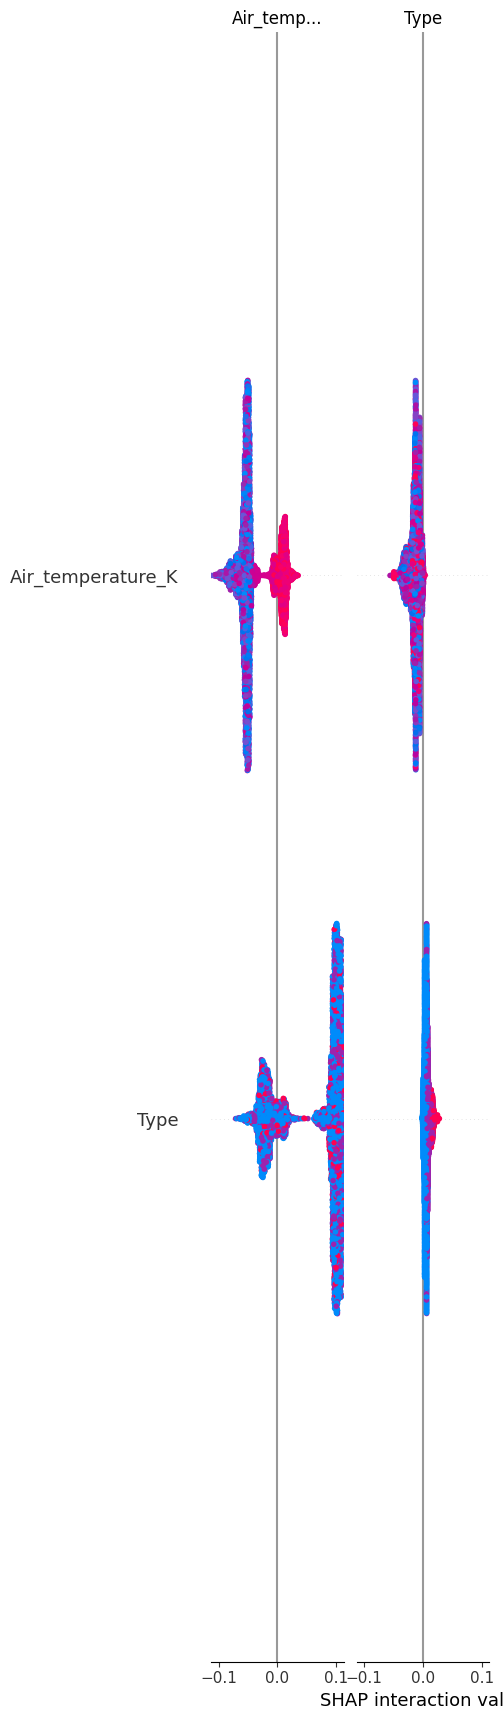

In [100]:
plt.figure(figsize=(8, 12))
shap.summary_plot(shap_values, X, max_display=20)


C:\Users\kvina\AppData\Local\Temp\ipykernel_21288\2108213740.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)
c:\Users\kvina\Documents\partnr\predictive-maintenance-ai4i\.venv\lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\kvina\Documents\partnr\predictive-maintenance-ai4i\.venv\lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to op

<Figure size 800x500 with 0 Axes>

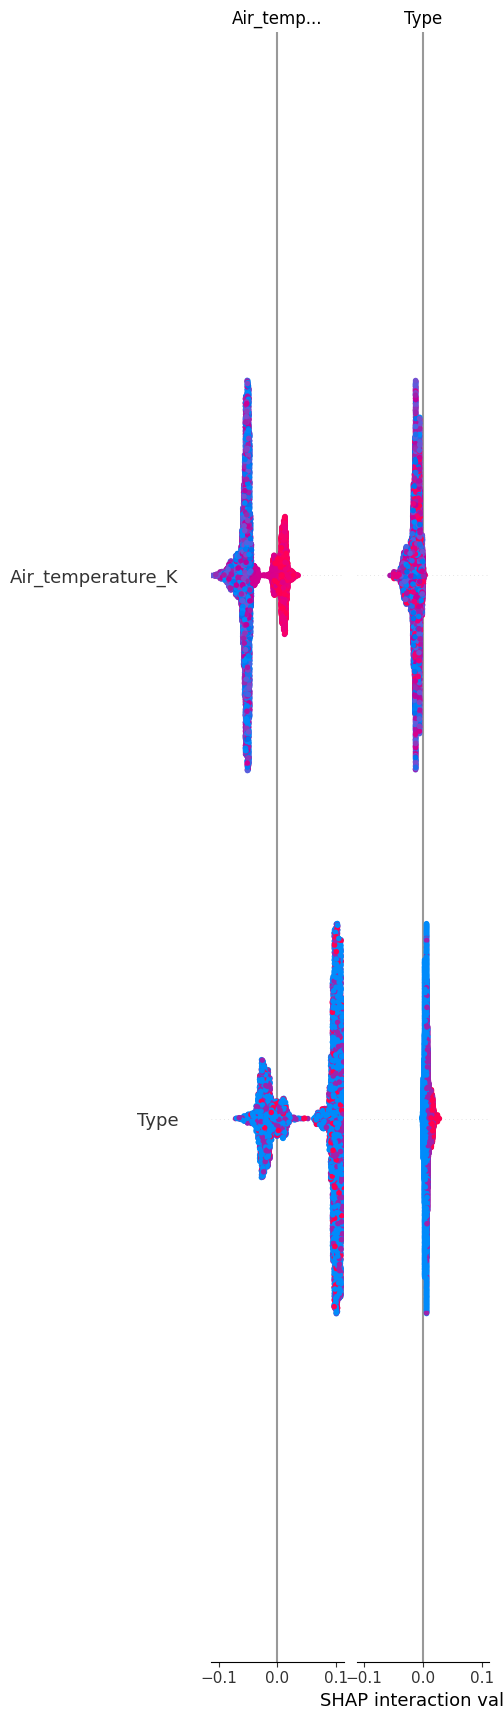

In [101]:
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)


Explaining final row index: 9999


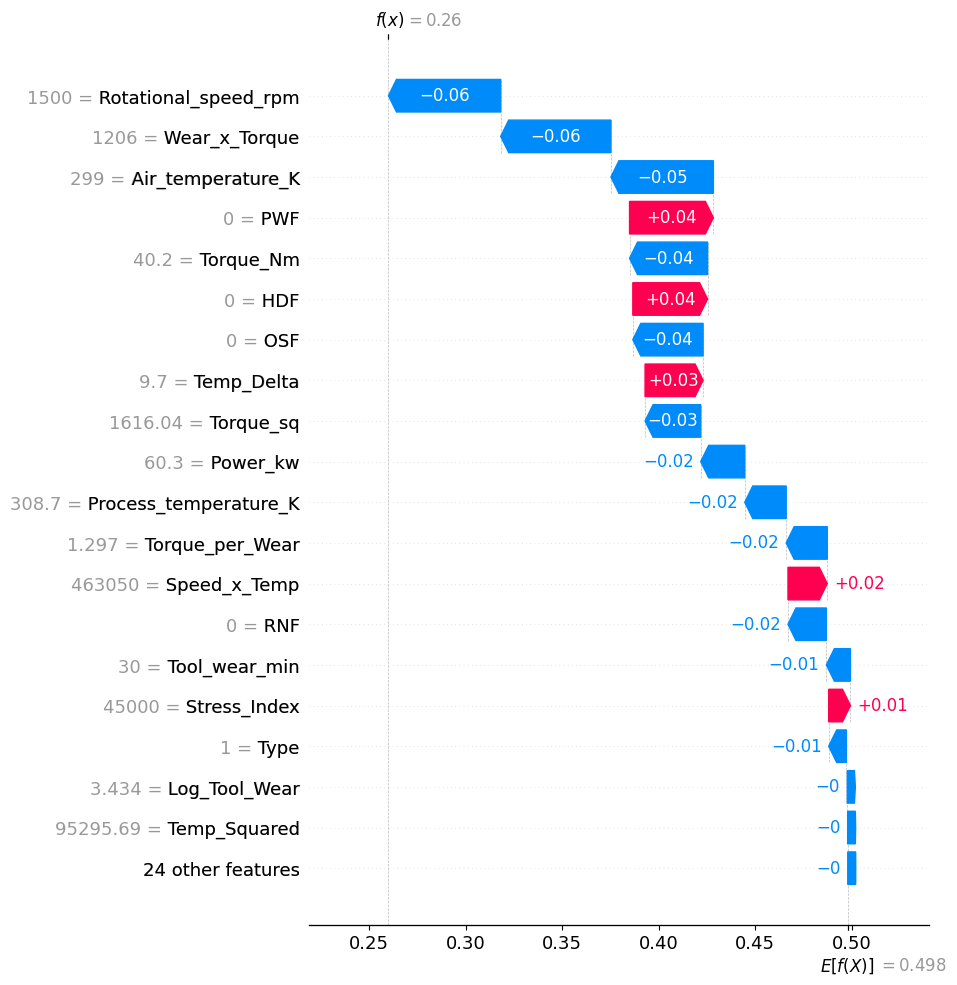

In [102]:
# -------- LOCAL WATERFALL EXPLANATION (Guaranteed Final Fix) --------

idx = X.index[-1]
print("Explaining final row index:", idx)

# Case 1: SHAP 3D (samples x features x classes)
if shap_values.ndim == 3:
    values = shap_values[idx, :, 1]    # class 1

    # Handle base value for class 1 safely
    base_raw = explainer.expected_value
    if isinstance(base_raw, (list, tuple, np.ndarray)):
        base = float(np.squeeze(base_raw)[1])
    else:
        base = float(base_raw)

# Case 2: SHAP 2D
else:
    values = shap_values[idx]

    base_raw = explainer.expected_value
    base = float(np.squeeze(base_raw))

# Build valid Explanation
sv_exp = shap.Explanation(
    values=values,
    base_values=base,
    data=X.iloc[idx].to_numpy(),
    feature_names=X.columns
)

shap.plots.waterfall(sv_exp, max_display=20)


In [103]:
# Compute global feature importance correctly
# If SHAP output is 3D: (samples, features, classes)
if shap_values.ndim == 3:
    # Take class 1 only
    shap_class = shap_values[:, :, 1]
else:
    shap_class = shap_values

# Compute mean absolute impact per feature
importances = abs(shap_class).mean(axis=0)

ranking = (
    pd.DataFrame({"feature": X.columns, "importance": importances})
    .sort_values("importance", ascending=False)
)

print("\nTop 10 most important features:")
display(ranking.head(10))



Top 10 most important features:


,feature,importance
3,Rotational_speed_rpm,0.065324
8,PWF,0.054243
9,OSF,0.049360
1,Air_temperature_K,0.044190
4,Torque_Nm,0.038951
17,Torque_sq,0.036442
12,Temp_Delta,0.031401
13,Wear_x_Torque,0.026972
11,Power_kw,0.026222
15,Torque_per_Wear,0.024267


In [104]:
print("✔ SHAP Explainability complete — all required plots generated!")


✔ SHAP Explainability complete — all required plots generated!


## 📊 SHAP Global Feature Importance Ranking

To understand which engineered signals most strongly influence machine failure predictions, we computed global SHAP feature importance scores.

### 🔍 Method
- SHAP values were generated for each feature across all samples.
- Because the model is a binary classifier, SHAP produces two sets of contributions:
  - Class 0 → normal operation
  - Class 1 → failure indication
- We focused exclusively on **class 1 SHAP values**, since these drive the model toward predicting failure.
- The **mean absolute SHAP value** was computed for each feature to capture overall importance.

### 🧠 Why This Matters
Features with higher SHAP importance:
- contribute more strongly to the model’s decision-making,
- reveal patterns that maintenance teams should monitor closely,
- help validate which engineered signals truly carry predictive power.

### 🏆 Result
The table below displays the **Top 10 most impactful features** influencing failure predictions, sorted by their average SHAP contribution.  
These features represent the strongest drivers of risk and can guide both operational insights and future feature engineering efforts.
